<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

Predicting numerical variable based on some other combinations of variables.

In [35]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating some data to view and fit


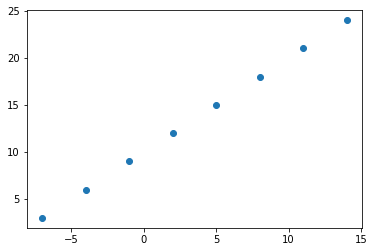

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [37]:
# Create a demo tensor for our housing peice prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [38]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [39]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [40]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 337ms/step - loss: 19.2641 - mae: 19.2641
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 18.9829 - mae: 18.9829
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 18.7016 - mae: 18.7016
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 18.4204 - mae: 18.4204
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.1391 - mae: 18.1391


In [41]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [42]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred # 11 points off then where it should be

1/1 [==============================] - 0s 60ms/step


array([[-16.5933]], dtype=float32)

In [43]:
y_pred + 11

array([[-5.5933]], dtype=float32)

## Improving a Model

we can improve our model by: 
1. **Creting a model** : add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**: change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: fit model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [44]:
# Let's rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 10.3150 - mae: 10.3150
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1825 - mae: 10.1825
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0500 - mae: 10.0500
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9175 - mae: 9.9175
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7850 - mae: 9.7850
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6525 - mae: 9.6525
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5200 - mae: 9.5200
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3875 - mae: 9.3875
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2550 - mae: 9.2550
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.1225 - mae: 9.1225
Epoch 11/100
1/1 [==============================] - 0s 10ms/step

In [45]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [46]:
model.predict([17.0])

1/1 [==============================] - 0s 65ms/step


array([[29.962366]], dtype=float32)

In [47]:
# Let's try to improve the model by adding an extra hidden layer with 100 hidden units.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),     # changes in learning rate were the most important
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 734ms/step - loss: 14.2048 - mae: 14.2048
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1402 - mae: 14.1402
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.0756 - mae: 14.0756
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0111 - mae: 14.0111
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9466 - mae: 13.9466
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8821 - mae: 13.8821
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.8176 - mae: 13.8176
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7531 - mae: 13.7531
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6886 - mae: 13.6886
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6241 - mae: 13.6241
Epoch 11/100
1/1 [==============================

In [48]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [49]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[28.150692]], dtype=float32)

## Evaluating a model
(hyperparameter tuning)

In [50]:
# Visualize while evaluating models for better understanding
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [51]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

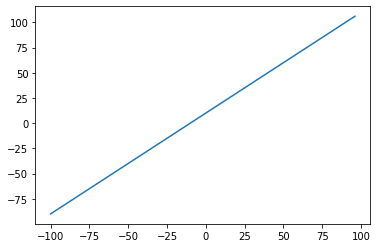

In [52]:
plt.plot(X, y);

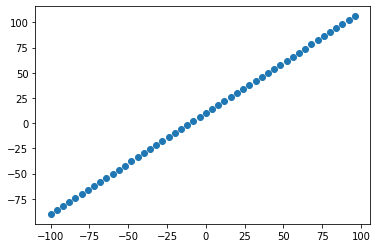

In [53]:
plt.scatter(X, y);

### The 3 sets...

* Training set - 70-80 percent 
* Validation set - 10-15 percent
* Test set - 10-15 percent

In [54]:
# check the lenght of how many samples we have
len(X)

50

In [55]:
# Split the data into train and test sets 
X_train = X[:40] # 1st 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

### Visualizing the data

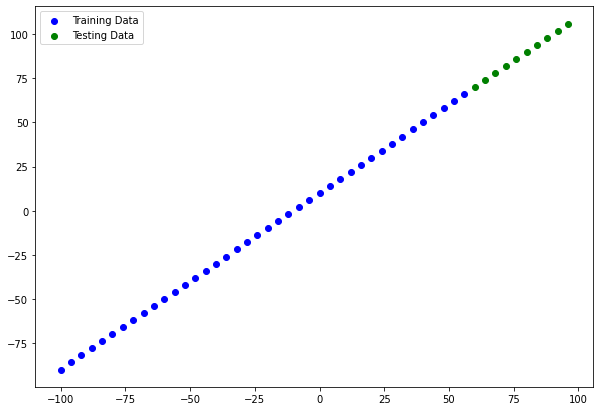

In [56]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data")
# Plot the testing data in green
plt.scatter(X_test, y_test, c = "g", label="Testing Data")
# Show a legend
plt.legend();

In [57]:
# Let's build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [58]:
# model.summary()

In [59]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer") # input shape is "1" as we pass one number to get another number through prediction.
], name="sample_model_1")

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [60]:
model.summary()  # Dense ~ Fully Connected Layer

Model: "sample_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameteres the model can updates as it trains
* Non-trainable params - Not updated while training. Brining in already learnt patters or parameters from other models during **Transfer Learning**

### There are **TWO** trainable parameters in every hidden unit.

In [61]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)  # setting verbose to "0" to avoid getting long deep learning outputs

In [62]:
# getting a summary
model.summary()

Model: "sample_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


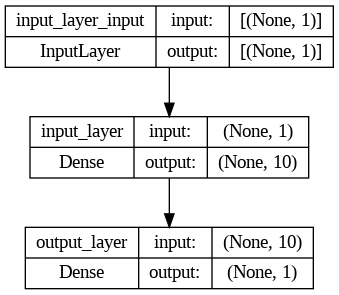

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize the predictions, plot them against the labels. (Ground truth).

In [64]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred 

1/1 [==============================] - 0s 66ms/step


array([[ 88.485435],
       [ 94.25993 ],
       [100.03444 ],
       [105.80893 ],
       [111.583435],
       [117.357925],
       [123.13242 ],
       [128.90694 ],
       [134.68143 ],
       [140.45593 ]], dtype=float32)

In [65]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [66]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  Plots training data, test data and compare predictions to the ground truth
  '''
  plt.figure(figsize = (10,7))
  # training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # training testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();



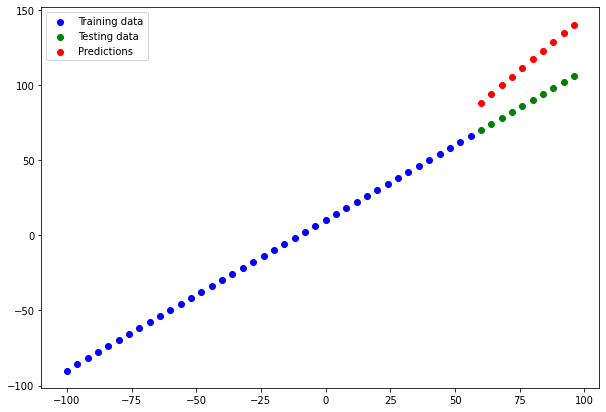

In [68]:
plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)